In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *



%matplotlib inline
pd.options.display.max_columns = None


#Load dataset
csv_path='CarPrice_Assignment.csv'
cars_dataset = pd.read_csv(csv_path)
cars_dataset.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Descibe dataset
cars_dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
                
for car in cars_dataset:
    print(f"{car} - {cars_dataset[car].nunique()}")


car_ID - 205
symboling - 6
CarName - 147
fueltype - 2
aspiration - 2
doornumber - 2
carbody - 5
drivewheel - 3
enginelocation - 2
wheelbase - 53
carlength - 75
carwidth - 44
carheight - 49
curbweight - 171
enginetype - 7
cylindernumber - 7
enginesize - 44
fuelsystem - 8
boreratio - 38
stroke - 37
compressionratio - 32
horsepower - 59
peakrpm - 23
citympg - 29
highwaympg - 30
price - 189


In [7]:
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
cars_dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
cars_dataset['CarName'] = cars_dataset['CarName'].str.split(' ',expand=True)[0]
cars_dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
cars_dataset['CarName'] = cars_dataset['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

cars_dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
cars_dataset=cars_dataset.drop(['car_ID'],axis=1)
cars_dataset.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


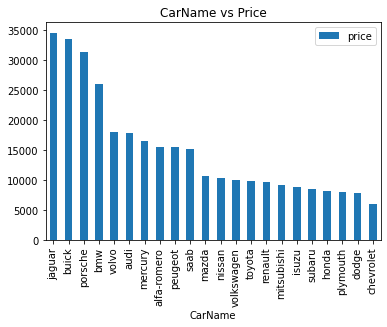

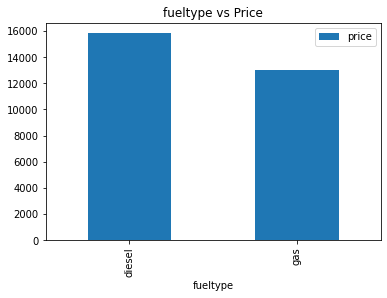

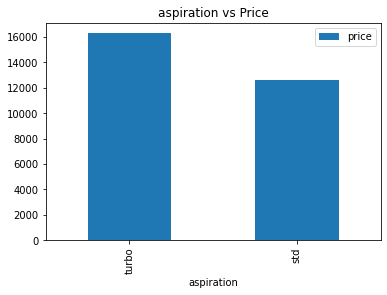

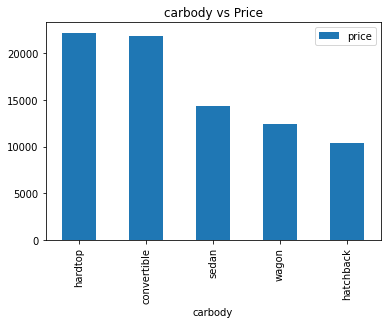

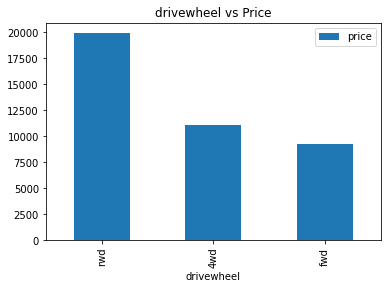

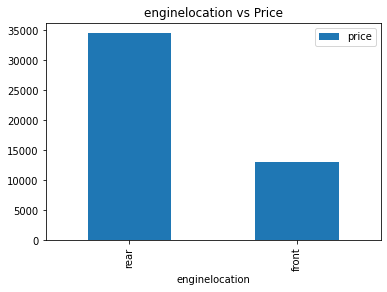

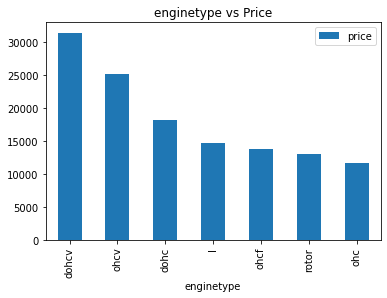

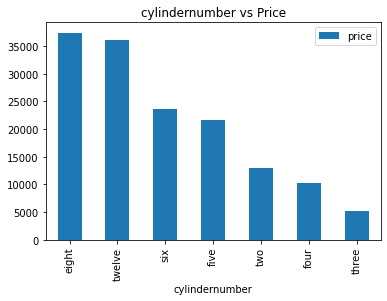

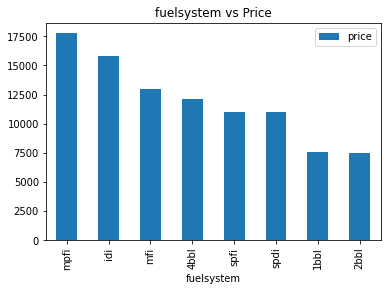

In [12]:
def compare_w_price(elements):
    cmp_plot=pd.DataFrame(cars_dataset.groupby(elements)['price'].mean().sort_values(ascending = False))
    cmp_plot.plot(kind="bar")
    plt.title(elements + " vs Price")

compare_w_price("CarName")
compare_w_price("fueltype")
compare_w_price("aspiration")
compare_w_price("carbody")
compare_w_price("drivewheel")
compare_w_price("enginelocation")
compare_w_price("enginetype")
compare_w_price("cylindernumber")
compare_w_price("fuelsystem")


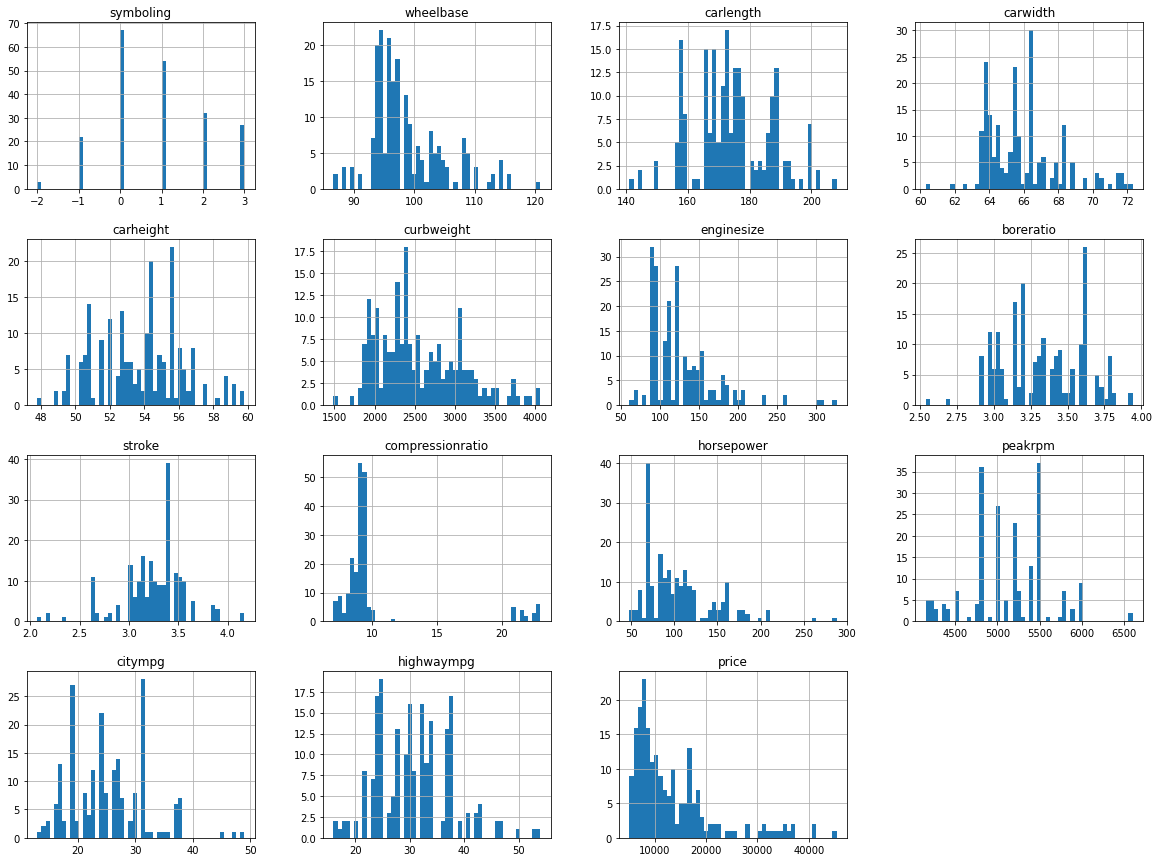

In [13]:
cars_dataset.hist(bins=50,figsize=(20,15))
plt.show()

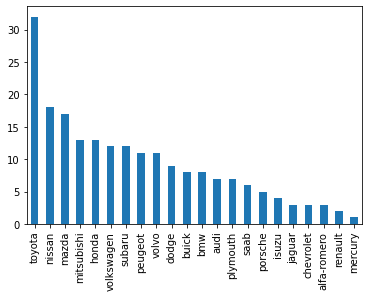

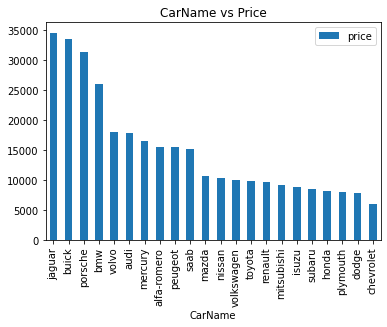

In [14]:
ax=cars_dataset['CarName'].value_counts().plot(kind='bar',stacked=True)
compare_w_price("CarName")

In [15]:
selected_dataset=cars_dataset
selected_dataset.head()



,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
selected_dataset2 = pd.get_dummies(selected_dataset, columns=selected_dataset.select_dtypes('object').columns, drop_first=False)
selected_dataset2.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:

X= selected_dataset2.drop('price', axis=1)
y= selected_dataset2['price']
indices=y.values

X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X,y,indices, test_size=0.2, random_state=42)



Weight is [ 1531.09221366  -871.13307781 -1640.17008822  1045.03360404
  -191.57533911  5740.34370961 26426.98834417  1077.53503132
   907.37813512  1427.12688213 21652.49751333  1315.59517291
  -241.29963177   165.8460344   1075.08668469  1104.55392044
  1219.18489341  1207.72006581  1071.45323274  1033.7703304
  1027.88031687  1054.05978167  1080.40232529  1131.33046156
  1055.78219751   994.52906666   983.53259285   899.71051336
  1022.96167362  1265.52506026  1038.91215362  1060.01391488
  1041.39268105   898.34528293  1067.36133156  1050.982321
  1072.96402345  1044.39028242  1169.47415105   947.88015483
   891.80509309  1225.54921278  1181.76169661  1199.48216189
   910.65766214  1205.94323707   809.58002261  1014.88630851
   953.18631884  1212.63850333   883.21959256  1234.13471331
   997.78034207  1076.37948635   899.71051336  1087.86316554
  1212.17056955  1079.50132175  1080.73303133  1196.73196317
  1117.31494379   713.53233683  1195.2997983   1063.35682482
  1067.16953172  

Text(0.5, 1.0, 'Linear Regression vs Price')

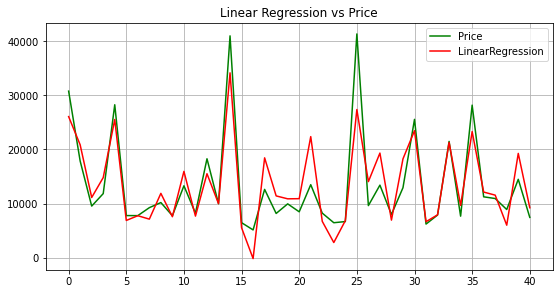

In [30]:
def find_weight_bias(x_train, y_train):
    weight_count = x_train.shape[1]
    w = np.zeros(weight_count)
    b = 0
    learning_rate = 0.001
    epochs = 100000
    n = len(x_train[0])
    for i in range(epochs):
        y_pred = np.dot(x_train, w) + b
        dw = (-2/n) * np.sum(x_train.T * (y_train - y_pred), axis=1)
        db = (-2/n) * np.sum(y_train - y_pred)
        w = w - learning_rate * dw
        b = b - learning_rate * db
    print("Weight is", w)
    print("Bias is", b)
    return w, b


def prediction(x_test, w, b):
    return np.dot(x_test,w) + b

#convert pandas dataframe to numpy array
x_train2 = X_train.to_numpy()
y_train1 = y_train.to_numpy()
x_test2 = X_test.to_numpy()
y_test1 = y_test.to_numpy()
#normalize data
x_train1 = (x_train2 - x_train2.mean()) / x_train2.std()
x_test1 = (x_test2 - x_test2.mean()) / x_test2.std()


# show X_train, y_train, x_test, y_test first 5 rows
w, b = find_weight_bias(x_train1, y_train1)
y_pred = prediction(x_test1, w, b)
print("Linear Regression score is",r2_score(y_test1,y_pred))
#plot comparison
plt.figure(1, figsize=(20, 10))
plt.subplot(221)
plt.plot(y_test1,"g",label="Price")
plt.plot(y_pred,"r",label="LinearRegression")
plt.grid(True)
plt.legend(loc="best")
plt.title("Linear Regression vs Price")

In [19]:


model2=RandomForestRegressor()
model2.fit(X_train, y_train)
prediction2=model2.predict(X_test)
print("Random Forest score is",r2_score(y_test,prediction2))

model3=KNeighborsRegressor()
model3.fit(X_train, y_train)
prediction3=model3.predict(X_test)
print("KNeighbors score is",r2_score(y_test,prediction3))

model4 = Sequential()
model4.add(InputLayer(input_shape=(X_train.shape[1],)))
    
model4.add(Dense(256,activation="relu",kernel_initializer="normal"))
model4.add(Dense(128,activation="relu",kernel_initializer="normal"))
model4.add(Dense(64,activation="relu",kernel_initializer="normal"))
model4.add(Dense(32,activation="relu",kernel_initializer="normal"))


optim = Adam()


model4.add(Dense(1,activation="linear",kernel_initializer="normal"))
model4.compile(loss="mse",optimizer= optim,metrics="mae")
model4.fit(X_train,y_train,batch_size=16,epochs=1000,validation_data=(X_test,y_test))
prediction4 = model4.predict(X_test)
print("Neural Network score is",r2_score(y_test,prediction4))




Random Forest score is 0.9582945849394553
KNeighbors score is 0.7722394362172684
Epoch 1/1000
11/11 [==============================] - 1s 15ms/step - loss: 234232512.0000 - mae: 13213.2207 - val_loss: 259869776.0000 - val_mae: 13452.1162
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 231599184.0000 - mae: 13115.9268 - val_loss: 252987024.0000 - val_mae: 13202.9531
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step - loss: 215713472.0000 - mae: 12521.0645 - val_loss: 216303936.0000 - val_mae: 11790.5977
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step - loss: 151983008.0000 - mae: 9591.2119 - val_loss: 104691896.0000 - val_mae: 5978.2544
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 64935168.0000 - mae: 5925.9507 - val_loss: 74313712.0000 - val_mae: 7646.4482
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 54000008.0000 - mae: 5768.9141 - val_loss: 67028000.0000 - val_mae: 53

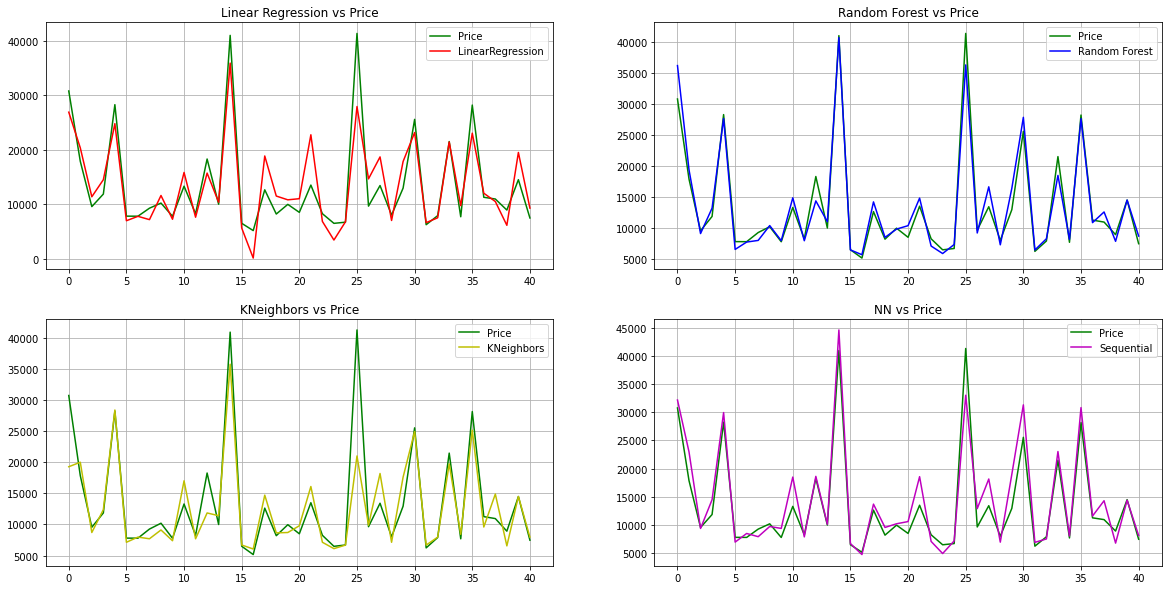

In [20]:

plt.figure(1, figsize=(20, 10))
plt.subplot(221)
plt.plot(indices_test,"g",label="Price")
plt.plot(y_pred,"r",label="LinearRegression")
plt.grid(True)
plt.legend(loc="best")
plt.title("Linear Regression vs Price")

plt.subplot(222)
plt.plot(indices_test,"g",label="Price")
plt.plot(prediction2,"b",label="Random Forest")
plt.grid(True)
plt.legend(loc="best")
plt.title("Random Forest vs Price")

plt.subplot(223)
plt.plot(indices_test,"g",label="Price")
plt.plot(prediction3,"y",label="KNeighbors")
plt.grid(True)
plt.legend(loc="best")
plt.title("KNeighbors vs Price")

plt.subplot(224)
plt.plot(indices_test,"g",label="Price")
plt.plot(prediction4,"m",label="Sequential")
plt.grid(True)
plt.legend(loc="best")
plt.title("NN vs Price")

plt.show()
